Data Wrangling II Create an “Academic performance” dataset of students and perform the following operations using Python.

1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution. Reason and document your approach properly.

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [34]:
# Read the csv file
df = pd.read_csv("tecdiv.csv")

In [8]:
df.head(1)

,Timestamp,Email Address,Name,Email,Roll no,PRN No.,Mobile No.,First year: Sem 1,First year: Sem 2,Second year: Sem 1,Second year: Sem 2
0,1/17/2022 12:45:09,sejal.zambare19@pccoepune.org,Sejal Zambare,sejal.zambare19@gmail.com,TECOC359,72026841K,8208217782,8.4,8.6,9.8,9.9


In [9]:
print("The first five rows are as follows: ")
df.head()

The first five rows are as follows: 


,Timestamp,Email Address,Name,Email,Roll no,PRN No.,Mobile No.,First year: Sem 1,First year: Sem 2,Second year: Sem 1,Second year: Sem 2
0,1/17/2022 12:45:09,sejal.zambare19@pccoepune.org,Sejal Zambare,sejal.zambare19@gmail.com,TECOC359,72026841K,8208217782,8.40,8.60,9.80,9.90
1,1/17/2022 12:45:44,rushikesh.thorat19@pccoepune.org,Rushikesh Vilas Thorat,rushikesh.thorat19@pccoepune.org,TECOC347,72026776F,9021261925,8.14,8.14,9.32,9.82
2,1/17/2022 12:46:10,atharv.sontakke19@pccoepune.org,Atharv Sontakke,atharv123sontakke@gmail.com,TECOC340,72026742M,9009804629,6.61,6.61,9.14,9.14
3,1/17/2022 12:46:21,amisha.sherekar19@pccoepune.org,Amisha Sunil Sherekar,amisha.sherekar19@pccoepune.org,TECOC328,72026696D,8698227548,7.20,7.30,8.90,9.20
4,1/17/2022 12:46:31,saurabh.sawardekar19@pccoepune.org,Saurabh Raju Sawardekar,saurabh.sawardekar19@pccoepune.org,TECOC326,72026682D,7774072850,7.05,7.45,9.05,9.40


In [10]:
print("The last five rows are as follows: ")
df.tail()

The last five rows are as follows: 


,Timestamp,Email Address,Name,Email,Roll no,PRN No.,Mobile No.,First year: Sem 1,First year: Sem 2,Second year: Sem 1,Second year: Sem 2
59,1/20/2022 9:24:40,pratik.meshram20@pccoepune.org,Pratik Amrut Meshram,pratik.meshram20@pccoepune.org,TECOC381,72164278M,7666479857,0.00,0.00,9.09,9.36
60,1/20/2022 9:36:14,prasad.zore19@pccoepune.org,Prasad Zore,prasad.zore@outlook.com,TECOC360,72026843F,7387645749,8.31,8.27,9.45,9.77
61,1/20/2022 9:42:34,sudhir.varu19@pccoepune.org,SUDHIR VARU,sudhirvaru01@gmail.com,TECOC351,72026799E,9657017250,8.31,8.42,8.53,8.64
62,1/20/2022 10:22:05,bhagyashree.takale19@pccoepune.org,Bhagyashree Gorakh Takale,bbhagyashree002@gmail.com,TECOC345,72026760K,8805813576,8.70,8.50,8.70,8.80
63,1/20/2022 10:38:06,sarvesh.waghmare19@pccoepune.org,Waghmare Sarvesh Jitendra,sarvesh.waghmare19@pccoepune.org,TECOC356,72026817G,7218935035,6.90,7.07,9.05,9.20


In [11]:
# Describtion about the dataset
df.describe()

,Mobile No.,First year: Sem 1,First year: Sem 2,Second year: Sem 1,Second year: Sem 2
count,6.400000e+01,64.000000,64.000000,64.000000,64.000000
mean,8.623097e+09,8.834219,9.095469,9.292031,9.377187
std,9.132070e+08,11.187839,11.171986,0.528523,0.495185
min,7.028870e+09,0.000000,0.000000,6.900000,7.200000
25%,7.766559e+09,7.237500,7.655000,9.050000,9.140000
50%,8.805720e+09,8.260000,8.400000,9.445000,9.450000
75%,9.335094e+09,8.802500,9.115000,9.645000,9.725000
max,9.975810e+09,95.000000,95.000000,9.910000,9.950000


In [12]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Timestamp             64 non-null     object 
 1   Email Address         64 non-null     object 
 2   Name                  64 non-null     object 
 3   Email                 64 non-null     object 
 4   Roll no               64 non-null     object 
 5   PRN No.               64 non-null     object 
 6   Mobile No.            64 non-null     int64  
 7   First year:   Sem 1   64 non-null     float64
 8   First year:   Sem 2   64 non-null     float64
 9   Second year:   Sem 1  64 non-null     float64
 10  Second year:   Sem 2  64 non-null     float64
dtypes: float64(4), int64(1), object(6)
memory usage: 5.6+ KB


In [13]:
print("The column names of the dataset are as follows: ")
df.columns

The column names of the dataset are as follows: 


Index(['Timestamp', 'Email Address', 'Name', 'Email', 'Roll no ', 'PRN No.',
       'Mobile No.', 'First year:   Sem 1', 'First year:   Sem 2',
       'Second year:   Sem 1', 'Second year:   Sem 2'],
      dtype='object')

In [14]:
'''
Scan all the variables for missing values and inconsistencies. 
if there are missing values and inconsistencies use any of the suitable techniques to deal with them
''' 
#if there is no missing values
df.isnull().sum()

Timestamp               0
Email Address           0
Name                    0
Email                   0
Roll no                 0
PRN No.                 0
Mobile No.              0
First year:   Sem 1     0
First year:   Sem 2     0
Second year:   Sem 1    0
Second year:   Sem 2    0
dtype: int64

Here, we can see that there are no null values. Hence, there is no need of data cleaning or replacing NULL values

In [23]:
# if we have missing values in our dataset
df1 = pd.read_excel("Employee_income.xlsx")
df1.isna().sum()

Name      0
Age       2
Income    2
dtype: int64

In [29]:
'''
# to handle the missing values we have some methods
df1.dropna()
df1.fillna(0)
df['class'].fillna('TE')
# mean
df['marks'].fillna(df['marks'].mean())
# median
df['age'].fillna(df['age'].median())
df['class'].mode()
df.fillna(method='backfill')
df.fillna(method='pad', inplace=True)
'''

"\n# to handle the missing values we have some methods\ndf1.dropna()\ndf1.fillna(0)\ndf['class'].fillna('TE')\n# mean\ndf['marks'].fillna(df['marks'].mean())\n# median\ndf['age'].fillna(df['age'].median())\ndf['class'].mode()\ndf.fillna(method='backfill')\ndf.fillna(method='pad', inplace=True)\n"

In [ ]:
'''
import numpy as np
x = np.array([5,4,3,2,6,7,98,28])
np.mean(x)
np.median(x)
np.mode(X)
'''

In [27]:
df1.isna().sum()

Name      0
Age       2
Income    2
dtype: int64

Here, we can see that there are no null values. Hence, there is no need of data cleaning or replacing NULL values

In [15]:
# Converting the roll numbers from TECOC342 --> 342
for i in df['Roll no '].iteritems():
    df['Roll no '][i[0]] = df['Roll no '][i[0]][-3:]
df.head()

C:\Users\sspm-engg\AppData\Local\Temp\ipykernel_12072\19921171.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Roll no '][i[0]] = df['Roll no '][i[0]][-3:]


,Timestamp,Email Address,Name,Email,Roll no,PRN No.,Mobile No.,First year: Sem 1,First year: Sem 2,Second year: Sem 1,Second year: Sem 2
0,1/17/2022 12:45:09,sejal.zambare19@pccoepune.org,Sejal Zambare,sejal.zambare19@gmail.com,359,72026841K,8208217782,8.40,8.60,9.80,9.90
1,1/17/2022 12:45:44,rushikesh.thorat19@pccoepune.org,Rushikesh Vilas Thorat,rushikesh.thorat19@pccoepune.org,347,72026776F,9021261925,8.14,8.14,9.32,9.82
2,1/17/2022 12:46:10,atharv.sontakke19@pccoepune.org,Atharv Sontakke,atharv123sontakke@gmail.com,340,72026742M,9009804629,6.61,6.61,9.14,9.14
3,1/17/2022 12:46:21,amisha.sherekar19@pccoepune.org,Amisha Sunil Sherekar,amisha.sherekar19@pccoepune.org,328,72026696D,8698227548,7.20,7.30,8.90,9.20
4,1/17/2022 12:46:31,saurabh.sawardekar19@pccoepune.org,Saurabh Raju Sawardekar,saurabh.sawardekar19@pccoepune.org,326,72026682D,7774072850,7.05,7.45,9.05,9.40


## Outliers

Scan all numeric variables for outliers.if there are outliers , use any of the suitable techniques to deal with them.

In [35]:
df.columns
#sns.boxplot(y=df['First year: Sem 1'])

Index(['Timestamp', 'Email Address', 'Name', 'Email', 'Roll no ', 'PRN No.',
       'Mobile No.', 'First year:   Sem 1', 'First year:   Sem 2',
       'Second year:   Sem 1', 'Second year:   Sem 2'],
      dtype='object')

<AxesSubplot:ylabel='First year:   Sem 1'>

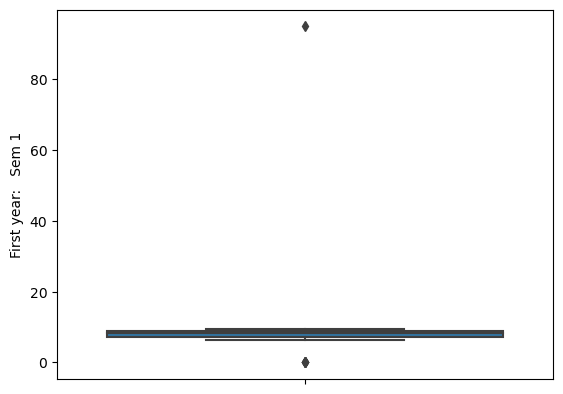

In [36]:
sns.boxplot(y=df['First year:   Sem 1'])

<AxesSubplot:ylabel='Second year:   Sem 1'>

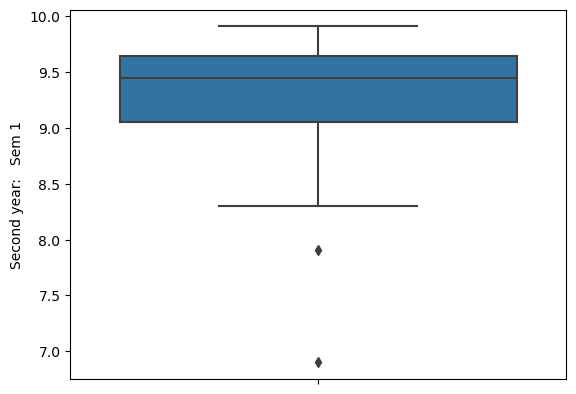

In [14]:
sns.boxplot(y=df["Second year:   Sem 1"])

<AxesSubplot:ylabel='Second year:   Sem 2'>

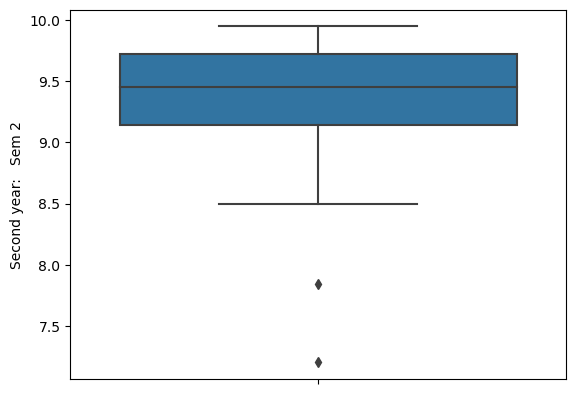

In [15]:
sns.boxplot(y=df["Second year:   Sem 2"])

Here, we have visualized the outliers for the results column in the dataset